<a href="https://colab.research.google.com/github/polock11/market_analysis_and_churn_prediction_with_decision_tree/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Market Analysis and Churn Prediction with Decision Tree

by **Shakib Ibna Shameem Polock**

In [1]:
#libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for classification and socring 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, plot_confusion_matrix

#for ignoring user warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Churn_dc.csv')

#enabling maximum columns views 
pd.options.display.max_columns = df.shape[1]

df.head(5)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


#Description of Features:

* **Account_Length:** Number of days of usage
* **Vmail_Message:** Number of voice mail sent
* **Day_Mins:** Total minutes spent for calls in day time
* **Eve_Mins:** Total minutes spent for calls in evening time
* **Night_Mins:** Total minutes spent for calls in night time
* **Intl_Mins:** Total minutes spent for calls in international calls
* **CustServ_Calls:** Number of customer service calls made
* **Intl_Plan:** Has international plans or not
* **Vmail_Plan:** Has voice mail plans or not
* **Day_Calls:** Number of calls made per day
* **Day_Charge:** Cost for calls in day (USD)
* **Eve_Calls:** Number of calls made per evening
* **Eve_Charge:** Cost for calls in evening (USD)
* **Night_Calls:** Number of calls made per night
* **Night_Charge:** Cost for calls in night (USD)
* **Intl_Calls:** Number of international calls made
* **Intl_Charge:** Cost for international calls (USD)
* **State:** Name of the States in USA
* **Area_Code:** Zip code of the area
* **Phone:** Phone number of customers

**Target Variable: Churn** 








In [4]:
# creating new fratures 
df['Total_Mins'] = df['Day_Mins']+ df['Eve_Mins']+df['Night_Mins']+df['Intl_Mins']
df['Total_Charge'] = df['Night_Charge']+ df['Intl_Charge']+df['Eve_Charge']+ df['Day_Charge']
df['Total_Calls'] = df['Night_Calls']+ df['Intl_Calls']+df['Eve_Calls']+ df['Day_Calls']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [6]:
#checking for null values
df.isna().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
Total_Mins        0
Total_Charge      0
Total_Calls       0
dtype: int64

**Observation:**
* There is no missing values

In [7]:
display(df.describe())
display(df.describe(include = 'O'))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code,Total_Mins,Total_Charge,Total_Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418,591.864776,59.449754,305.137114
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290,89.954251,10.502261,34.448164
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000,284.300000,22.930000,191.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000,531.500000,52.380000,282.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000,593.600000,59.470000,305.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000,652.400000,66.480000,328.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000,885.000000,96.150000,416.000000


,Churn,Intl_Plan,Vmail_Plan,State,Phone
count,3333,3333,3333,3333,3333
unique,2,2,2,51,3333
top,no,no,no,WV,382-4657
freq,2850,3010,2411,106,1


**Observation:**
* Maximum usage is 243 days and minimum usage is 1 day
* Average calls made per consumer was 304
* Maximum charge was 96$ and average charge was 59\$
* 0 to 75% customers have called the customer care twice
* People are talking more in the evening and night times
* Day charge is more then evening and night times 

In [7]:
#droping the sensitive features
df = df.drop(['State','Area_Code', 'Phone'], axis = 1)

In [8]:
#getting all the categorical features
cat_var = []

for column in df.columns:
    if df[column].dtypes == 'O':
        cat_var.append(column)
print(cat_var)

#getting all the numneric features
num_var = []

for column in df.columns:
    if df[column].dtypes != 'O':
        num_var.append(column) 

print(len(num_var))


['Churn', 'Intl_Plan', 'Vmail_Plan']
18


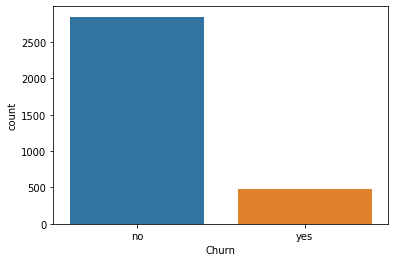

In [5]:
sns.countplot(x= 'Churn', data = df);

**Observation:**
* There is 2850 comsumers who have not Churned
* There is 483 consumers who have Churned

The dataset is on balanced.

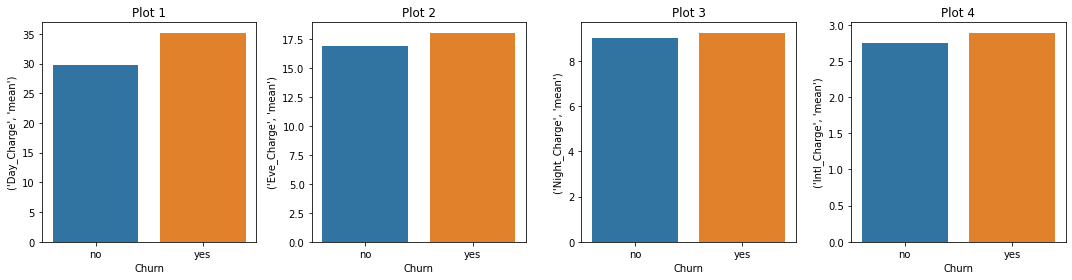

In [12]:
'''
    Average costing of comsumers in Day, Night, Evening and International calls
'''


plt.figure(figsize = (15,4))

charges = ['Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge']

#plotting barplots 
for i in range(len(charges)):
    
    plt.subplot(1,4,i+1)
    
    #grouped by churn type, calculating the the mim, max, mean(avg) of each type
    charge_ = df.groupby('Churn')[[charges[i]]].agg(['min','max','mean']).reset_index()
    sns.barplot(x = 'Churn', y = (charges[i],'mean'), data = charge_);
    plt.title('Plot '+ str(i+1))

plt.tight_layout()

**Observation:**
* Plot 1: Those who have churned their average costing for day calls were higher than those who have not
* Plot 2: Customer Churned payed more in their evening charges
* Plot 3: Customer Churned payed more in their night charges as well
* Plot 4: Customer stayed payed less than those of who churned making a international call

**Overall** people are leaving the service due to higher charges in all sorts of calls

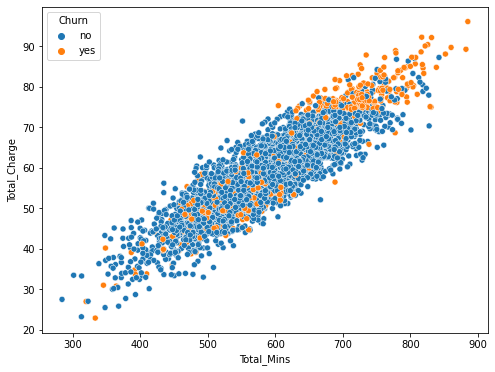

In [9]:
plt.figure(figsize = (8,6))

#plotting total_chaege vs Total_mins by churn type
sns.scatterplot(x = 'Total_Mins', y = 'Total_Charge', hue = "Churn", data = df);

**Observation:**
* as the call duration increases the charges also increases
* a considerable portion have Churned is talking between 610 mins to 900 mins and being charged for 75$ to 90\$ 

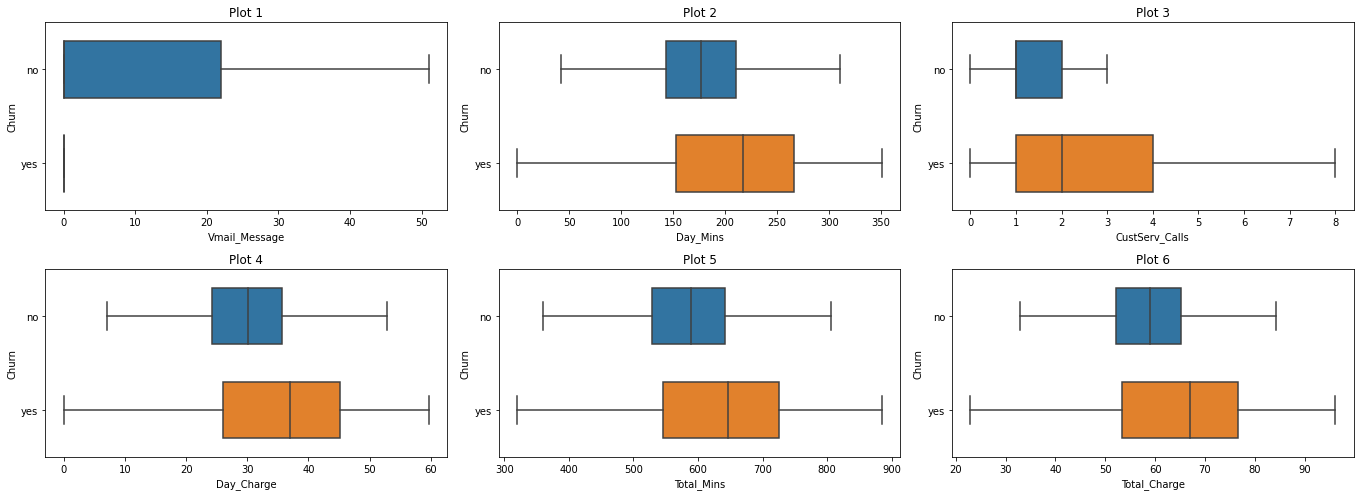

In [11]:
plt.figure(figsize = (19,7))

s = ['Vmail_Message', 'Day_Mins', 'CustServ_Calls',  'Day_Charge', 'Total_Mins', 'Total_Charge']

for i in range(len(s)):

    plt.subplot(2,3, i+1)
    sns.boxplot(y = 'Churn', x = s[i], data = df, showfliers = False, width = .6 );
    plt.title('Plot '+ str(i+1))

plt.tight_layout()


**Observation:**
* Plot 1: People churned never used the voice message, those who've used it seems they are geting good services
* Plot 2: Who have talked more during day time have churned, it can be due to higher charge
* Plot 3: Those who have churned called the customer care very frequently, may be they are not getting their provlem solved
* Plot 4: Day charge is higher for Churned comsumers than of those who didn't churned
* Plot 5: Those who are talking more they are Churning
* Plot 6: Churning due to higher costing 

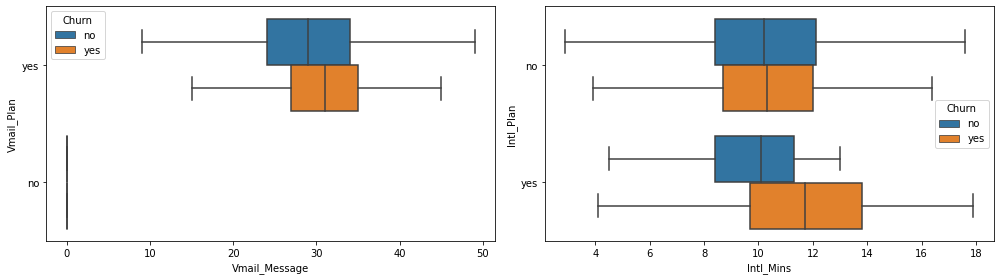

In [15]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.boxplot(x = 'Vmail_Message' ,y ='Vmail_Plan', hue ='Churn', data =df, showfliers = False);

plt.subplot(1,2,2)
sns.boxplot(x = 'Intl_Mins' ,y ='Intl_Plan', hue ='Churn', data =df, showfliers = False);
plt.tight_layout()

In [14]:
#Encodin the binary categorical features
le = LabelEncoder()

df['Churn'] = le.fit_transform(df['Churn'])
df['Intl_Plan'] = le.fit_transform(df['Intl_Plan'])
df['Vmail_Plan'] = le.fit_transform(df['Vmail_Plan'])


In [15]:
#getting the correlation matrix
correlation_matrix_ = df.corr()

#laying of the redundancies 
mask = np.zeros_like(correlation_matrix_)
mask[np.triu_indices_from(mask)] = True

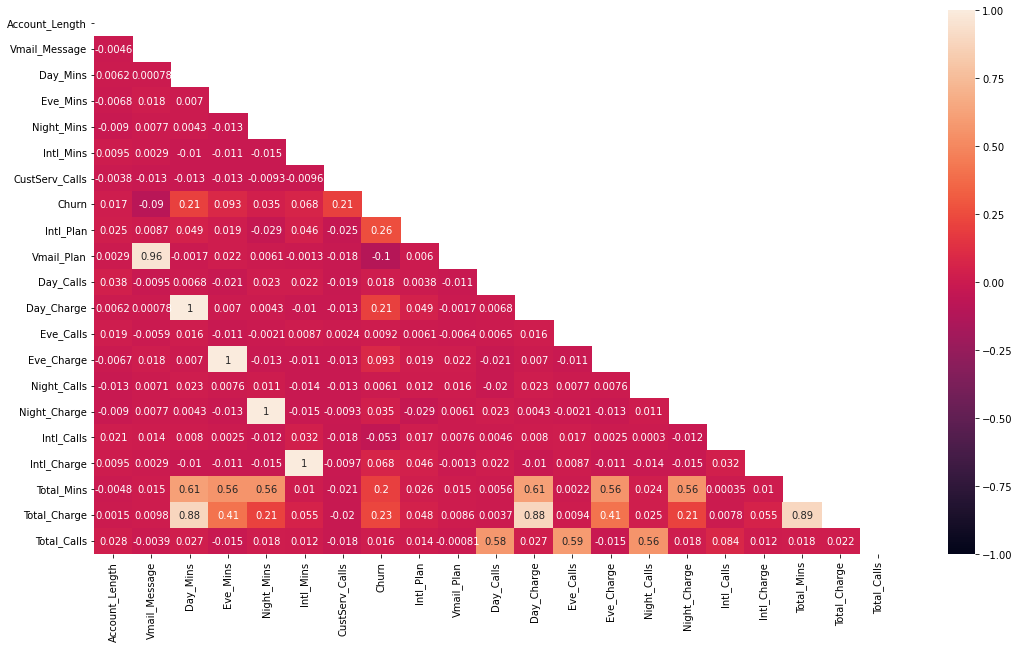

In [34]:
#ploting the heatmap
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix_, vmin = -1, vmax = 1, annot = True, mask = mask);

#Splitting the data for training and testing 

In [21]:
X = df.drop('Churn', axis = 1)
y = df[['Churn']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify  = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 20), (667, 20), (2666, 1), (667, 1))

#Applying General Decision Tree

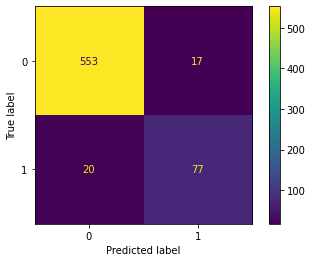

In [23]:
model  = DecisionTreeClassifier(random_state = 42)
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_confusion_matrix(model, X_test, y_test);

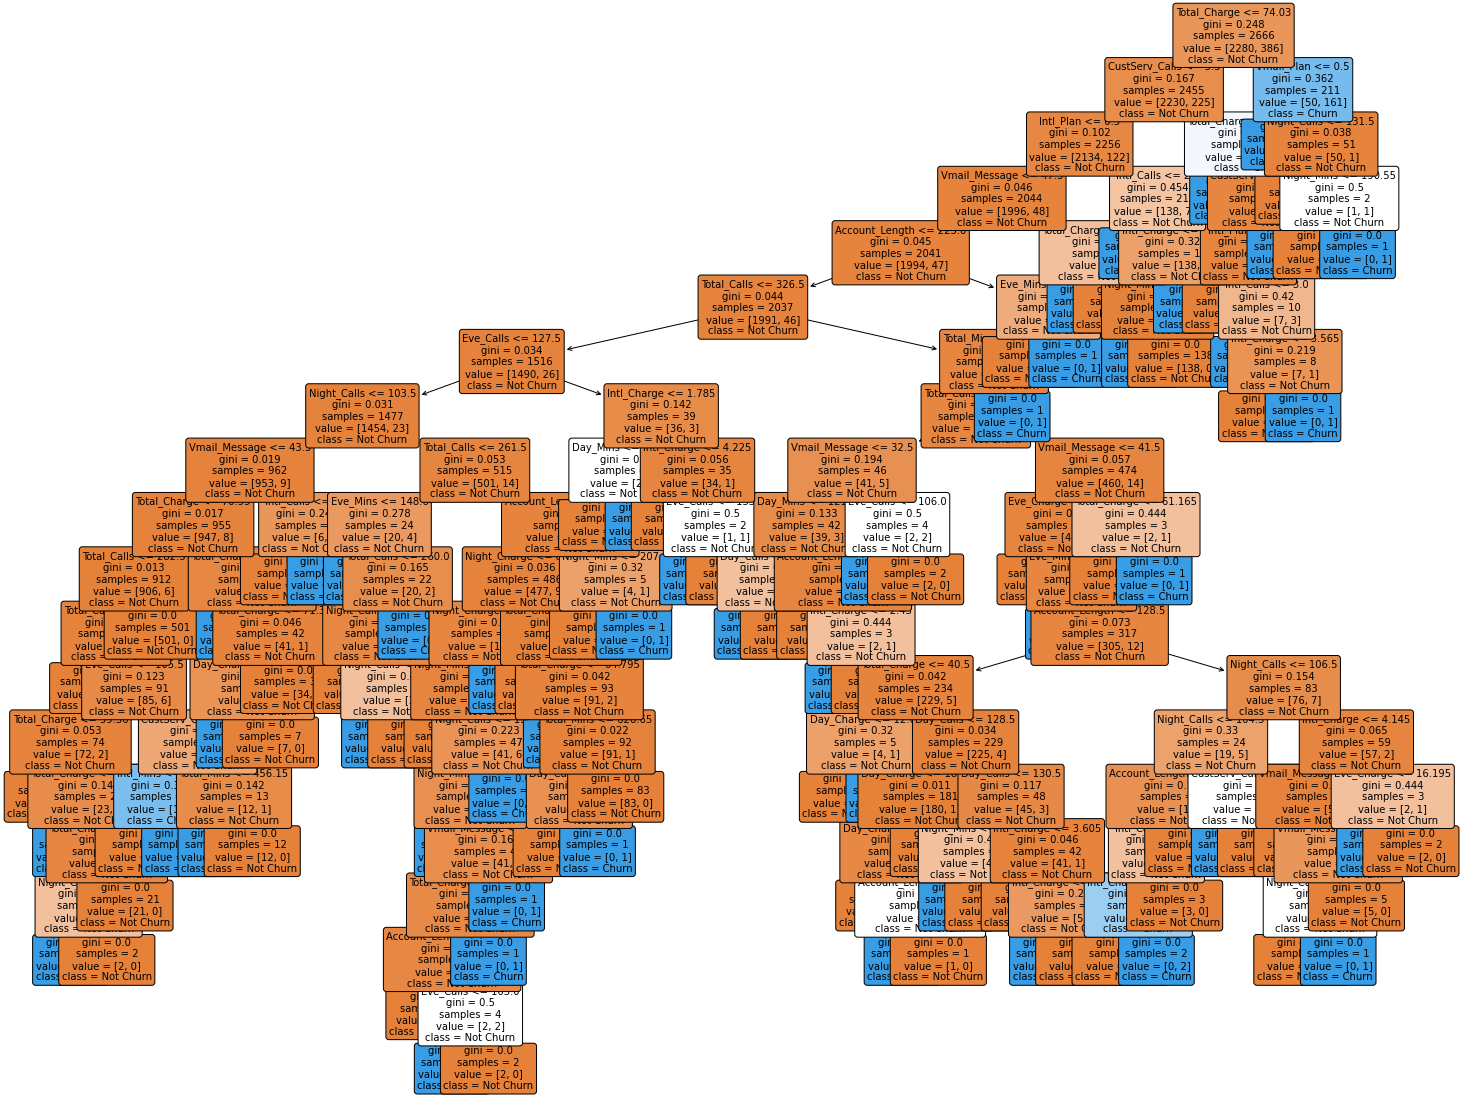

In [37]:
plt.figure(figsize = (25,20))

#plotting the general tree
plot_tree(model,  
          feature_names = X.columns, 
          filled = True, 
          rounded = True, 
          class_names =['Not Churn', 'Churn'],
          fontsize = 10)

plt.show()

**Observation:**
* The tree is extremely complex hence it leads to overfitting with low bais and high varience.  

In [25]:
#performance indicators
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       570
           1       0.82      0.79      0.81        97

    accuracy                           0.94       667
   macro avg       0.89      0.88      0.89       667
weighted avg       0.94      0.94      0.94       667



**Observation:**
Here the main objective is to predict whether a coustomer is going to Churn or not. But looking at the tree it is clear that the default Decision Tree is overfitted. Although it has a good accuracy of 94%, but it will not perform good in terms of unseen data. So, pre and post prunning will come in handy here to avoid the overfitting problem. 

#Pre-Prunning the tree with GridSearchCV

In [72]:
#for ignoring user warnings

import warnings
warnings.filterwarnings("ignore")

#selecting hyperparameters to find the best parameters
parameters = {'criterion':['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(2,7,1),
              'min_samples_leaf': range(1,15,1),
              'min_samples_split': range(2,15,1),
              'max_features': ['auto', 'log2', 'sqrt']}

model_grid = DecisionTreeClassifier(random_state = 42)

#initiating grid search with 5 fold cross validation
grid_search = GridSearchCV(estimator = model_grid,
                           param_grid = parameters,
                           n_jobs = -1,
                           cv = 5,
                           scoring = 'recall'
                           )

grid_result = grid_search.fit(X_train, y_train)

In [73]:
#checking the best parameters for the decision tree
grid_result.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 14,
 'min_samples_split': 2,
 'splitter': 'best'}

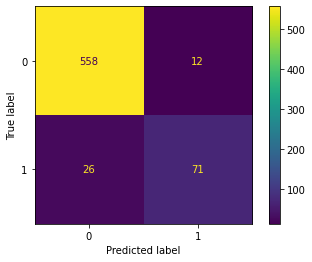

In [74]:
plot_confusion_matrix(grid_result, X_test,y_test)

In [75]:
y_pred_cv = grid_result.predict(X_test)

classReport = classification_report(y_test, y_pred_cv)
print(classReport)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       570
           1       0.86      0.73      0.79        97

    accuracy                           0.94       667
   macro avg       0.91      0.86      0.88       667
weighted avg       0.94      0.94      0.94       667



**Observation:**
recall and f1-score decreased minimally but the precision increased and the accuracy remained the same. However the model is not overfitted this time.  

#Post-Prunning the tree with Cost Complexity Prunning

In [88]:
clf_dt = DecisionTreeClassifier(random_state = 42)

# getting all the ccp_alpha and impurity values
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [89]:
clfs = []

'''
    Applying the classifire for all the ccp_alpha values and storing them
    in the clfs list
'''
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 42, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

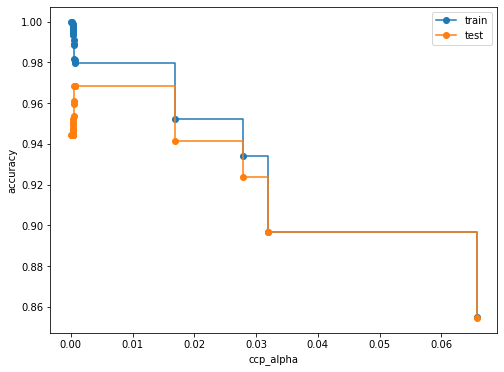

In [90]:
#getting all the accuracies for the classifires with different ccp_alpha values using the trianing data
train_score = [model.score(X_train, y_train) for model in clfs]

#getting all the accuracies for the classifires with different ccp_alpha values for the testing data
test_score = [model.score(X_test, y_test) for model in clfs]

plt.figure(figsize = (8,6))

#plotting accuracy score for train and test data to find the balanced ccp_alpha value
plt.plot(ccp_alphas, train_score, marker = 'o', label = 'train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_score, marker = 'o', label = 'test', drawstyle="steps-post")
plt.legend()
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')

plt.show()

**Findings:**
As the alpha value increases the accuracy decreases for both train and test data. From 0.002 to .01 gives a consistant accuracy of 98% in the train data and close to 97% for the test data. So, the selected ccp_alpha value is .01.


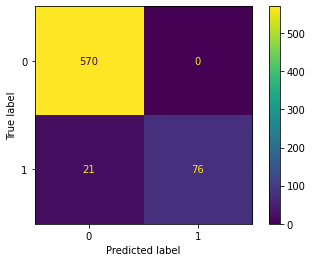

In [29]:
model_dt_pp = DecisionTreeClassifier(random_state = 42, ccp_alpha=.010)
model_dt_pp = model_dt_pp.fit(X_train, y_train)

y_pred_pp = model_dt_pp.predict(X_test)

plot_confusion_matrix(model_dt_pp, X_test, y_test);

**Observation:** Here in the confusion matrix False Postives improved significantly.

In [30]:
#getting performance indicators for cost complexity prunning
cr_pp = classification_report(y_test, y_pred_pp)
print(cr_pp)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       1.00      0.78      0.88        97

    accuracy                           0.97       667
   macro avg       0.98      0.89      0.93       667
weighted avg       0.97      0.97      0.97       667



**Observation:** precision, recall and f1-score improved than the pre prunning, Also this model is not overfitted.  

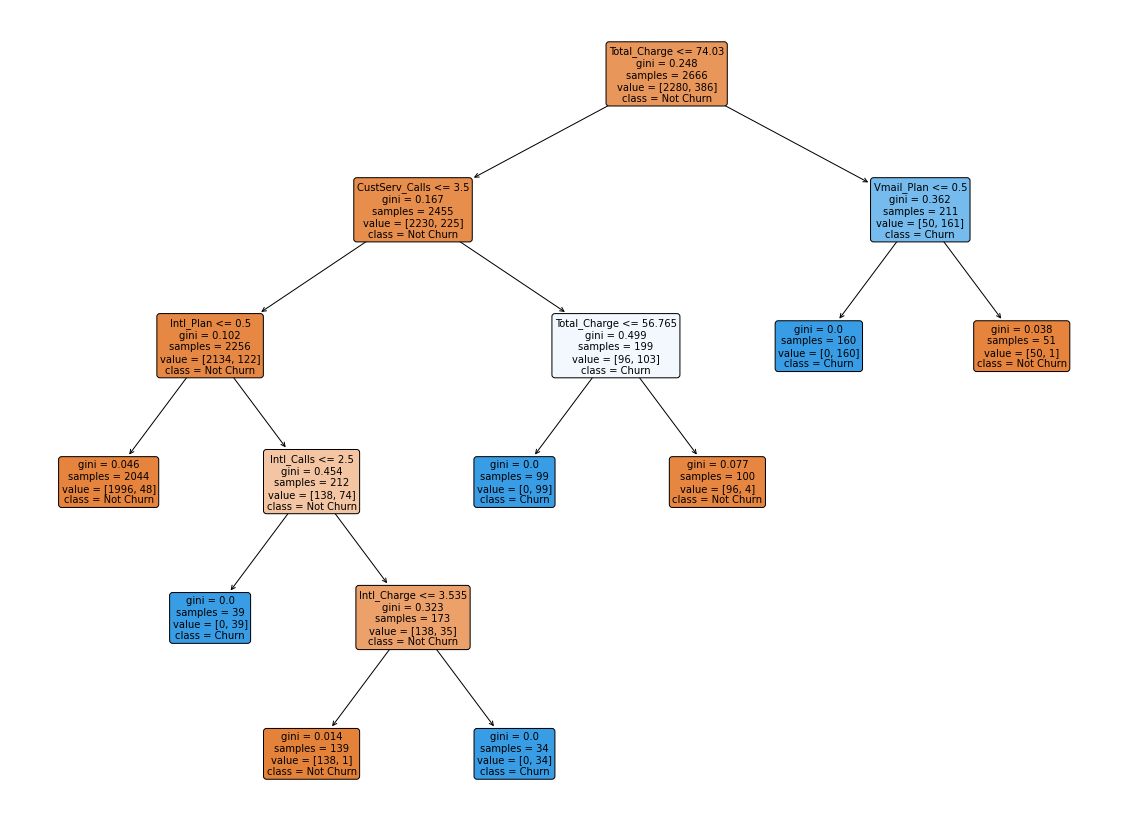

In [35]:
plt.figure(figsize = (20,15))

plot_tree(model_dt_pp,  
          feature_names = X.columns, 
          filled = True, 
          rounded = True, 
          class_names =['Not Churn', 'Churn'],
          fontsize = 10)

plt.show()

**Observation:** The tree here is easier to interprate and less complex. It overcomes the overfitting issue.


#Final Thoughts:
The post prunned model showes better results than the generic and the pre prunned model. 